In [32]:
import os
import datetime
import re
import requests  
import json
import numpy as np

In [33]:
home_path = os.getcwd()
home_path = '/'.join(home_path.split('/')[:-2])
subdir_path = os.path.join(home_path, 'hh_data_raw')
subdir_content = os.listdir(subdir_path)

In [34]:
os.path.join(subdir_path, subdir_content[0])

'/home/audioidiom/jupyter_proj/hws/bdproj_backup/bdproj/hh_data_raw/2024-02-28'

In [35]:
min_date = datetime.date.fromisoformat("2100-01-01")
max_date = datetime.date.fromisoformat("2000-01-01")
c = 0
distinct_dates = dict()

for d in subdir_content:
    path = os.path.join(subdir_path, d)
    vac_txts = os.listdir(path)
    for vac in vac_txts:
        vac_path = os.path.join(path, vac)
        with open(vac_path, 'r') as f:
            lines = f.read()
            if bool(re.match('.*created_at.*', lines)):
                created_at = lines.split('"created_at":')[1].split(',')[0][1:-1]
                created_at = created_at[:-2] + ':' + created_at[-2:]
                created_at = datetime.datetime.fromisoformat(created_at).date()
                c += 1
        if created_at < min_date:
            min_date = created_at
        if created_at > max_date:
            max_date = created_at
        if created_at in distinct_dates.keys():
            distinct_dates[created_at] += 1
        else:
            distinct_dates[created_at] = 1
    print(d)

print('min', min_date)
print('max', max_date)
print(c)

2024-02-28
2024-02-26
2024-02-29
2024-02-25
min 2020-11-02
max 2024-02-28
66033


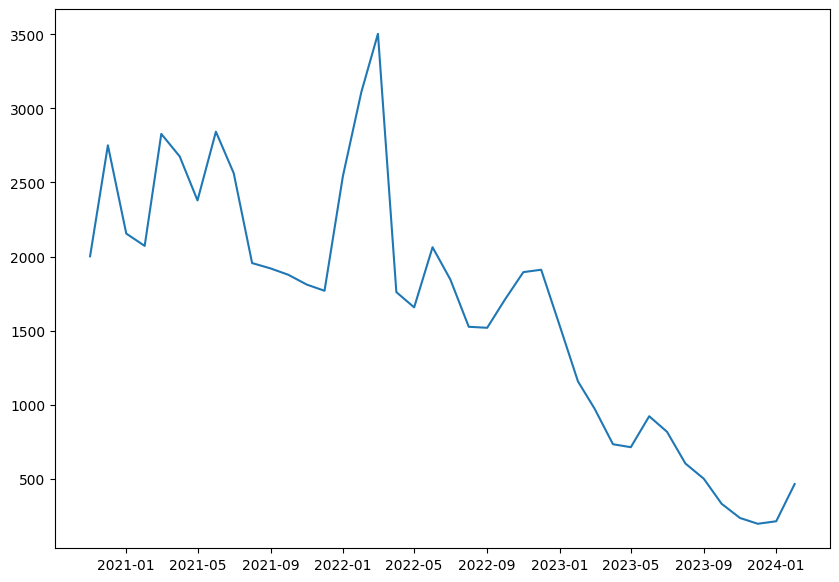

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

dates = pd.DataFrame(list(zip(distinct_dates.keys(), distinct_dates.values())))
dates[0] = dates[0].map(lambda x: pd.Timestamp(x).date())
dates = dates.sort_values(by=0)
dates['months'] = dates[0].to_numpy().astype('datetime64[M]')
dates_by_m = dates.groupby('months')[1].sum()

fig,ax = plt.subplots(figsize=(10,7))
ax.plot(dates_by_m)

In [37]:
dates_by_m

months
2020-11-01    2002
2020-12-01    2751
2021-01-01    2155
2021-02-01    2072
2021-03-01    2828
2021-04-01    2676
2021-05-01    2379
2021-06-01    2843
2021-07-01    2563
2021-08-01    1956
2021-09-01    1920
2021-10-01    1877
2021-11-01    1811
2021-12-01    1769
2022-01-01    2544
2022-02-01    3110
2022-03-01    3504
2022-04-01    1760
2022-05-01    1657
2022-06-01    2063
2022-07-01    1845
2022-08-01    1526
2022-09-01    1519
2022-10-01    1710
2022-11-01    1895
2022-12-01    1911
2023-01-01    1536
2023-02-01    1157
2023-03-01     973
2023-04-01     733
2023-05-01     713
2023-06-01     922
2023-07-01     817
2023-08-01     603
2023-09-01     500
2023-10-01     331
2023-11-01     235
2023-12-01     196
2024-01-01     213
2024-02-01     464
Name: 1, dtype: int64

In [38]:
dates[1].sum()

66039

In [12]:
import datetime

In [13]:
dates_df =\
    pd.DataFrame({'id': [],
                  'created_at': [],
                  'published_at': []})

In [14]:
date = datetime.datetime.now().strftime('%Y-%m-%d')

while date != '2024-02-25':
    date = datetime.datetime.now().strftime('%Y-%m-%d')
    vacancy_id = np.random.randint(0, 1_000_000_000)
    if vacancy_id not in dates_df['id'].values:
        url = f'https://api.hh.ru/vacancies/{vacancy_id}'
        try:
            response = requests.get(url)
        except Exception as e:
            print(e, '\n')
            print(f"Error datetime: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        if response.ok:
            created_at_str = json.loads(response.content)['created_at'].split('T')[0]
            published_at_str = json.loads(response.content)['published_at'].split('T')[0]

            created_dt = datetime.datetime.strptime(created_at_str, '%Y-%m-%d').date()            
            published_dt = datetime.datetime.strptime(published_at_str, '%Y-%m-%d').date()

            to_append = pd.DataFrame({'id': [vacancy_id],
                                      'created_at': [created_dt],
                                      'published_at': [published_dt]})
            dates_df = pd.concat([dates_df, to_append], axis=0)

        if datetime.datetime.now().second == 59:
            print(dates_df.shape[0])

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
dates_df\
.loc[dates_df['created_at'] >= datetime.date(2022,1,1)].plot(x='created_at', y='id',ax=ax)

___

In [48]:
tf_log = os.path.join('/'.join(os.getcwd().split('/')[:-2]), 'hh_data_raw/2024-02-25/log.txt')
ts_log = os.path.join('/'.join(os.getcwd().split('/')[:-2]), 'hh_data_raw/2024-02-26/log.txt')

In [49]:
with open(tf_log, 'r') as f:
    log = f.readlines()
    last_lines = log[-10:]
    ids_25 = set(map(lambda x: int(x.split('\t\t\t\t')[1].split(' ')[0]), log))
    
with open(ts_log, 'r') as f:
    log = f.readlines()
    ids_26 = set(map(lambda x: int(x.split('\t\t\t\t')[1].split(' ')[0]), log))